In [1]:
from puffergoat import PufferGoat as sketch

In [2]:
import numpy as np

def make_data(n, pattern='rand'):
    np.random.seed(seed=0)
    data=np.zeros(n)
    b = 1/n
    data[0:2] = [0,1]
    if pattern == 'up':
        data[2:] = np.linspace(b, 1-b, n-2)
    elif pattern == 'down':
        data[2:] = np.linspace(1-b, b, n-2)
    elif pattern == 'in':
        data[2::2] = np.linspace(b  , 0.5-b, n//2-1)
        data[3::2] = np.linspace(1-b, 0.5+b, n//2-1)
    elif pattern == 'out':
        data[2::2] = np.linspace(0.5-b, b  , n//2-1)
        data[3::2] = np.linspace(0.5+b, 1-b, n//2-1)
    else:
        data[2:] = np.random.rand(n-2)
    return data



In [3]:
import matplotlib.pyplot as plt

def populate_plot(axes, _xs, sketch):
    data_xs = np.array(_xs)
    data_ys = np.array(range(len(_xs)))+1
    data_xs_steps = np.repeat(data_xs,2)[1:]
    data_ys_steps = np.repeat(data_ys,2)[:-1]
    axes.plot(data_xs_steps, data_ys_steps)    
    x1s, x2s, lower_ys, upper_ys = sketch.get_bounds()
    double_xs = np.array([x for pair in zip(x1s, x2s) for x in pair])
    axes.vlines(list(x1s)+[1.0], -len(_xs)/10, -len(_xs)/5, colors=(.5,.5,.5), linestyles='solid')
    axes.plot(double_xs, np.repeat(upper_ys+0.05,2))
    axes.plot(double_xs, np.repeat(lower_ys-0.05,2))
    #axes.set_axis_off()

In [4]:
n = 1000
data = make_data(n,'rand')

In [5]:
k= 10
s = sketch(k)
    
for i, x in enumerate(data):
    s.update(x)

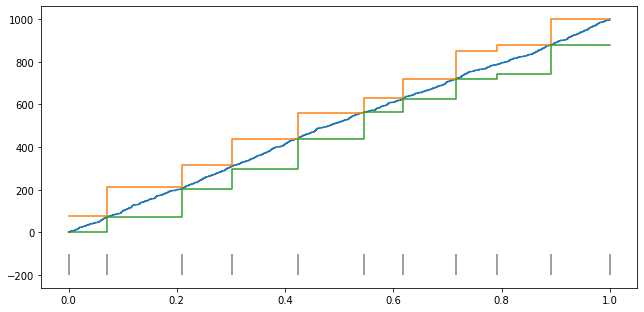

In [6]:
fig, axs = plt.subplots(1)
fig.set_figheight(4.5)
fig.set_figwidth(9)
plt.tight_layout()
populate_plot(axs, sorted(data), s)
